<h1 style="color:black" align="center">KNN Classification</h1>

**Importing Important Libraries**

In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Importing Dataset from sklearn Library**

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

**Column's in Iris Dataset**

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

**Feature's in Iris Dataset**

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Creating a DataFrame from Data**

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Adding Target Column to the DataFrame**

In [9]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Exploring the Target Set**

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


**Adding Target Name to the Data Frame**

In [14]:
df["flower_name"] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Visualization of Data**

**Creating 3 Different DataFrame from Orignal DataFrame**

In [15]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

**Creating Scatter Plot with "sepal length (cm)", "sepal width (cm)" as X and Y Axis**

Text(0, 0.5, 'sepal width (cm)')

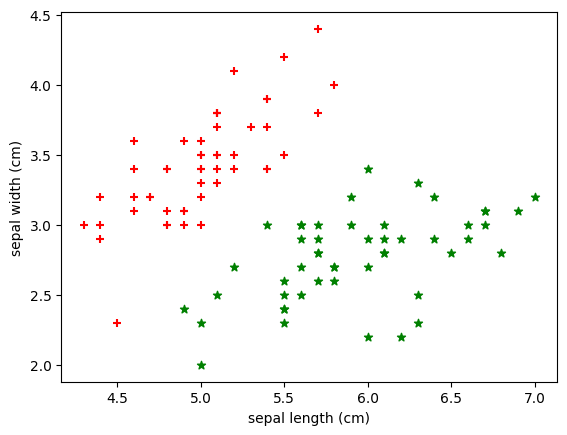

In [16]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="red",marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="green",marker="*")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

**Creating Scatter Plot with "petal length (cm)", "petal width (cm)" as X and Y Axis**

Text(0, 0.5, 'petal width (cm)')

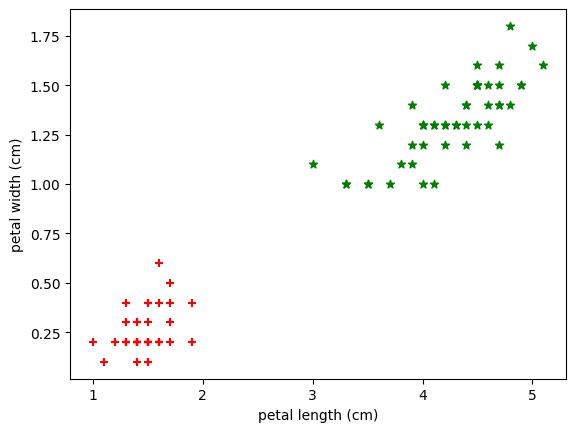

In [17]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="red",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green",marker="*")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

**Creating Dependent and Independent Variable**

In [18]:
X = df.drop(["target","flower_name"], axis = "columns")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

**Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(X_train), len(X_test)

(120, 30)

**Importing KNN Classifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)

**Fitting the Model**

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**Predicting Result from Model**

In [26]:
knn.predict([[5.1,3.5,1.4,0.2]]) #Values from iris DataFrame with index=0

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
knn.predict([[7.0,3.2,4.7,1.4]]) #Values from iris DataFrame with index=50

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
knn.predict([[6.3,3.3,6.0,2.5]]) #Values from iris DataFrame with index=100

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

**Score of Model**

In [29]:
knn.score(X_test, y_test)

0.9333333333333333

**Importing Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred = knn.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)

**Plotting Confusion Matrix**

Text(45.722222222222214, 0.5, 'Truth')

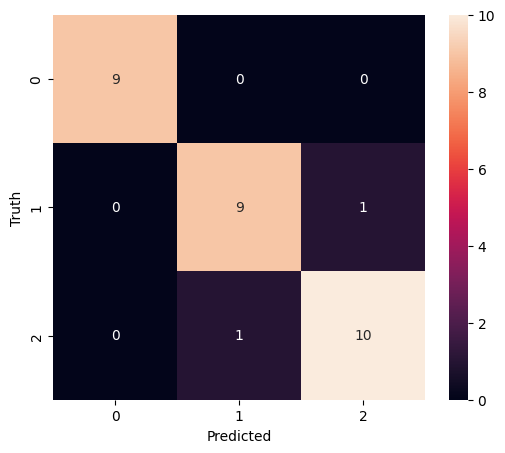

In [37]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')